In [1]:
from datasets import BasicDataset
from models import XGBModel

In [2]:
ds = BasicDataset(
    ohe_features=[
        "CONTRACT_CREDIT_INTERMEDIARY",
        "CONTRACT_CURRENCY",
        "CONTRACT_FREQUENCY_TYPE",
        "CONTRACT_LOAN_CONTRACT_TYPE",
        "CONTRACT_LOAN_TYPE",
        "CONTRACT_MORTGAGE_TYPE",
        "CONTRACT_REFINANCED",
        "CONTRACT_TYPE_OF_INTEREST_REPAYMENT",
        "BORROWER_TYPE_OF_CUSTOMER",
        "BORROWER_TYPE_OF_SETTLEMENT",
    ],
    le_features=[
        "CONTRACT_BANK_ID",
        "BORROWER_CITIZENSHIP",
        "BORROWER_COUNTRY",
        "BORROWER_COUNTY"
    ],
    categorical_features=[],
    log_transform_features=[
        "CONTRACT_CREDIT_LOSS",
        "CONTRACT_INCOME",
        "CONTRACT_LOAN_AMOUNT",
        "CONTRACT_MARKET_VALUE",
        "CONTRACT_MORTGAGE_LENDING_VALUE",
    ],
    numerical_features=[
        "CONTRACT_RISK_WEIGHTED_ASSETS",
        "CONTRACT_DEPT_SERVICE_TO_INCOME",
        "CONTRACT_INSTALMENT_AMOUNT",
        "CONTRACT_INSTALMENT_AMOUNT_2",
        "CONTRACT_INTEREST_PERIOD",
        "CONTRACT_INTEREST_RATE",
        "CONTRACT_LGD",
        "CONTRACT_LOAN_TO_VALUE_RATIO",
        "BORROWER_BIRTH_YEAR",
    ],
    feature_engineered_cols=[]
    )

/Users/peter.nagy/repos/datarace23/datasets/base.py:208: RuntimeWarning: invalid value encountered in log1p
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log1p(x), 0))
/Users/peter.nagy/repos/datarace23/datasets/base.py:208: RuntimeWarning: invalid value encountered in log1p
  df[feature] = df[feature].apply(lambda x: np.where(x > 0, np.log1p(x), 0))


In [3]:
ds.save()

'2023-11-22-10-59-0d5a1'

In [22]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [11]:
ds.train_df

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_INTEREST_PERIOD,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_AMOUNT,CONTRACT_LOAN_CONTRACT_TYPE,CONTRACT_LOAN_TO_VALUE_RATIO,CONTRACT_LOAN_TYPE,CONTRACT_MARKET_VALUE,CONTRACT_MATURITY_DATE,CONTRACT_MORTGAGE_LENDING_VALUE,CONTRACT_MORTGAGE_TYPE,CONTRACT_REFINANCED,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY,label
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2015-01-29 12:00:00,NaN,479a2e13,NaN,9545.0,11059.0,NaN,22.08,175424.0,192161,1,NaN,69f70539,NaN,2017-02-13 12:00:00,NaN,NaN,1.0,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaT,0
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2015-01-13 12:00:00,NaN,479a2e13,NaN,9528.0,NaN,NaN,16.57,994868.0,55590,2,NaN,b503a0de,NaN,2015-07-13 12:00:00,784680.0,5.0,NaN,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaT,0
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2015-01-20 12:00:00,7.05,479a2e13,127305.0,8899.0,8880.0,50.0,22.35,282553.0,275924,2,NaN,b503a0de,NaN,2019-02-15 12:00:00,NaN,NaN,2.0,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaT,0
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2015-01-15 12:00:00,NaN,479a2e13,NaN,14329.0,12966.0,NaN,0.00,68981.0,138862,2,NaN,b503a0de,NaN,2015-11-18 12:00:00,NaN,NaN,NaN,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaT,0
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2015-03-09 12:00:00,NaN,479a2e13,NaN,4003.0,3901.0,37.0,23.92,163319.0,169624,1,NaN,69f70539,NaN,2022-03-09 12:00:00,NaN,NaN,2.0,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602726,9BB120C1,nTLFZ821,f789f8b0,NaN,NaN,31,2015-09-24 12:00:00,NaN,2f88e16c,NaN,NaN,NaN,NaN,NaN,NaN,2411583,1,NaN,2f88e16c,NaN,2021-09-06 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaT,0
1602728,EA6E978B,Yd0bTvZL,f789f8b0,NaN,NaN,31,2015-09-01 12:00:00,NaN,2f88e16c,NaN,NaN,NaN,NaN,NaN,NaN,7468216,12,NaN,2f88e16c,NaN,2035-09-10 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaT,0
1602735,PSX4Bv+Y,7wROC4k9,2c6f5579,NaN,NaN,31,2015-04-22 12:00:00,NaN,3265c5b7,NaN,0.0,NaN,NaN,NaN,NaN,185311,3,NaN,d3aaffde,NaN,2016-04-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaT,0
1602746,F8ABD1BF,349Vst/r,f789f8b0,NaN,NaN,31,2015-09-30 12:00:00,NaN,2f88e16c,NaN,NaN,NaN,NaN,NaN,NaN,249469,4,NaN,2f88e16c,NaN,2019-10-07 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaT,0


In [11]:
ds.train_df.CONTRACT_CREDIT_INTERMEDIARY.value_counts()

CONTRACT_CREDIT_INTERMEDIARY
2.0        319496
1.0        151803
20001.0      8471
0.0           960
Name: count, dtype: int64

In [13]:
ds.train_df.CONTRACT_REFINANCED.value_counts()

CONTRACT_REFINANCED
2.0        428386
1.0         43270
10001.0      8114
0.0           960
Name: count, dtype: int64

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

def plot_categorical_to_label_corr(df, feature: str):
    df = df[[feature, 'label']].copy()
    # one hot encode the categorical feature
    ohe = OneHotEncoder(sparse_output=False)
    ohe.fit(df[[feature]])
    ohe_df = pd.DataFrame(ohe.transform(df[[feature]]), columns=ohe.get_feature_names_out([feature]))
    df = pd.concat([df, ohe_df], axis=1)
    df.drop(columns=[feature], inplace=True)

    corr = df.corr()
    plt.figure(figsize=(50, 50))
    sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [57]:
plot_categorical_to_label_corr(ds.train_df, 'BORROWER_BIRTH_YEAR')

KeyboardInterrupt: 

In [55]:
# get the top 10 columns with the highest correlation to the label
corr['label'].sort_values(ascending=False)[:10]

label                    1.000000
BORROWER_COUNTY_94.0     0.008670
BORROWER_COUNTY_183.0    0.007318
BORROWER_COUNTY_154.0    0.007298
BORROWER_COUNTY_80.0     0.005560
BORROWER_COUNTY_78.0     0.005003
BORROWER_COUNTY_99.0     0.004919
BORROWER_COUNTY_155.0    0.004679
BORROWER_COUNTY_39.0     0.004627
BORROWER_COUNTY_97.0     0.004625
Name: label, dtype: float64

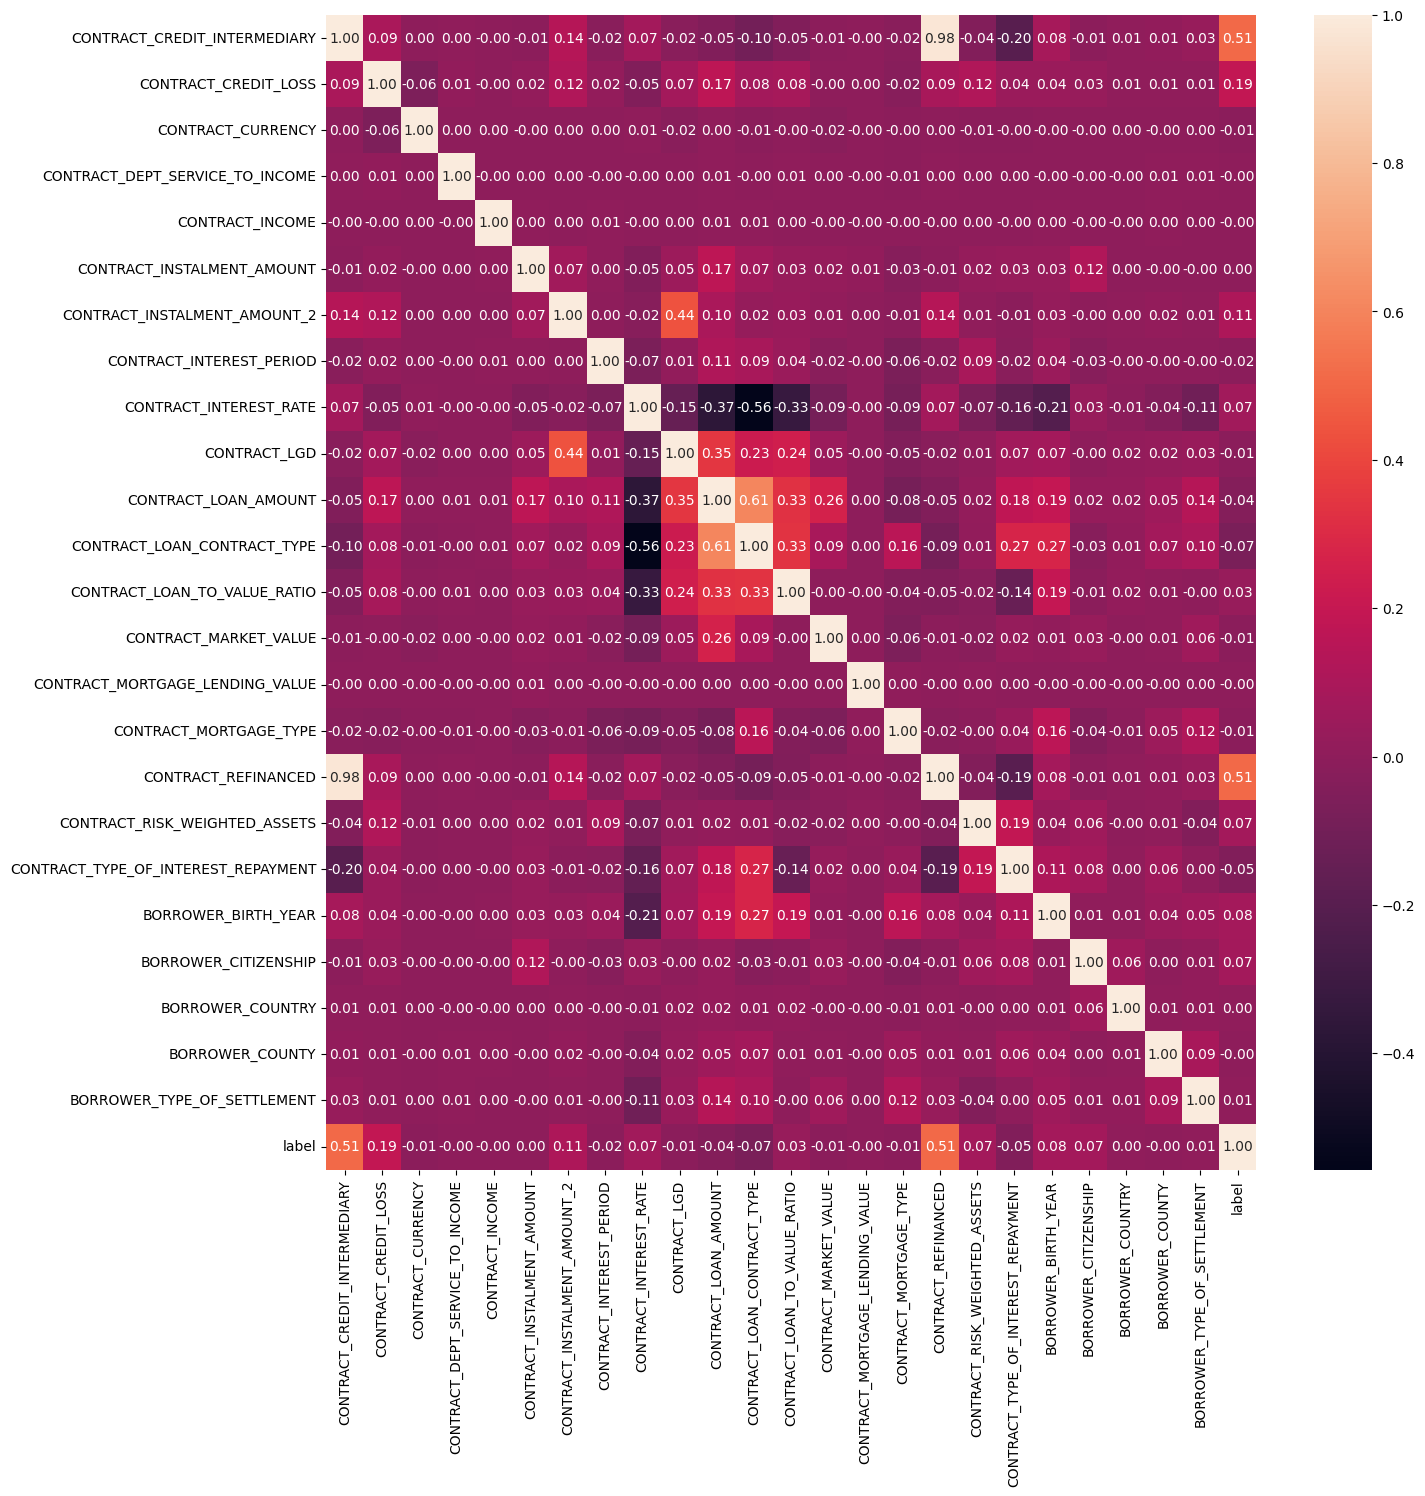

In [10]:
# test feature correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = ds.train_df.drop(columns=['CONTRACT_ID',
                                 'BORROWER_ID',
                                 'CONTRACT_BANK_ID',
                                 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
                                 'CONTRACT_FREQUENCY_TYPE',
                                 'CONTRACT_LOAN_TYPE',
                                 'CONTRACT_MATURITY_DATE',
                                 'BORROWER_TYPE_OF_CUSTOMER',
                                 'TARGET_EVENT',
                                 'TARGET_EVENT_DAY'
                                 ]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
# save as png
# plt.savefig("corr.png")
plt.show()

In [19]:
# calculate information gain for categorical features
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df = ds.train_df.copy()


le = LabelEncoder()
df['TARGET_EVENT'] = le.fit_transform(df['TARGET_EVENT'])

cat_features = ds.categorical_features
cat_features.extend(ds.ohe_features)
cat_features.extend(ds.le_features)

cat_features = list(set(cat_features))

for feat in cat_features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])


def calc_information_gain(df, target, features):
    info_gain = mutual_info_classif(df[features], df[target], random_state=0)
    return pd.Series(info_gain, index=features).sort_values(ascending=False)


info_gain = calc_information_gain(df, 'TARGET_EVENT', cat_features)
info_gain_df = pd.DataFrame(info_gain, columns=['information_gain'])
info_gain_df

,information_gain
CONTRACT_CURRENCY,0.135432
CONTRACT_LOAN_TYPE,0.123715
CONTRACT_REFINANCED,0.096749
CONTRACT_MORTGAGE_TYPE,0.091484
CONTRACT_BANK_ID,0.088707
...,...
CONTRACT_FREQUENCY_TYPE,0.071307
CONTRACT_LOAN_CONTRACT_TYPE,0.063401
BORROWER_TYPE_OF_SETTLEMENT,0.055257
BORROWER_COUNTY,0.016957


In [24]:
info_gain_df

,information_gain
CONTRACT_CURRENCY,0.135432
CONTRACT_LOAN_TYPE,0.123715
CONTRACT_REFINANCED,0.096749
CONTRACT_MORTGAGE_TYPE,0.091484
CONTRACT_BANK_ID,0.088707
CONTRACT_CREDIT_INTERMEDIARY,0.084012
CONTRACT_TYPE_OF_INTEREST_REPAYMENT,0.077958
BORROWER_CITIZENSHIP,0.075208
BORROWER_COUNTRY,0.072250
CONTRACT_FREQUENCY_TYPE,0.071307


In [34]:
model = XGBModel(
    {
        "n_estimators": 100,
        "max_depth": 10,
        "learning_rate": 0.1,
        "subsample": 0.5,
        "colsample_bytree": 0.5,
        "reg_alpha": 1,
        "reg_lambda": 1,
        "random_state": 42,
        "n_jobs": 4,
    }
)

In [35]:
model.fit(ds)

Cross-validation scores mean: 0.9945962266916265, std: 0.00028491594833889337
Test score: 0.9951556830486902


0.9951556830486902

In [36]:
model.save()

'2023-11-22-10-49-ebad7'

In [27]:
subm = pd.read_csv('submissions/submission_baseline.csv')

In [38]:
pred_df = model.predict(ds)#.to_csv('submissions/submission_baseline2.csv', index=False)

In [42]:
ds.test_df

,BORROWER_ID,CONTRACT_BANK_ID,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,CONTRACT_CREDIT_LOSS,CONTRACT_INCOME,CONTRACT_LOAN_AMOUNT,CONTRACT_MARKET_VALUE,CONTRACT_MORTGAGE_LENDING_VALUE,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INSTALMENT_AMOUNT,CONTRACT_INSTALMENT_AMOUNT_2,CONTRACT_INTEREST_PERIOD,CONTRACT_INTEREST_RATE,CONTRACT_LGD,CONTRACT_LOAN_TO_VALUE_RATIO,BORROWER_BIRTH_YEAR,CONTRACT_CREDIT_INTERMEDIARY_0.0,CONTRACT_CREDIT_INTERMEDIARY_1.0,CONTRACT_CREDIT_INTERMEDIARY_2.0,CONTRACT_CREDIT_INTERMEDIARY_20001.0,CONTRACT_CURRENCY_14,CONTRACT_CURRENCY_24,CONTRACT_CURRENCY_31,CONTRACT_FREQUENCY_TYPE_2aebe4cb,CONTRACT_FREQUENCY_TYPE_2f88e16c,CONTRACT_FREQUENCY_TYPE_3265c5b7,CONTRACT_FREQUENCY_TYPE_479a2e13,CONTRACT_FREQUENCY_TYPE_87db11f5,CONTRACT_FREQUENCY_TYPE_89efd382,CONTRACT_FREQUENCY_TYPE_ad534644,CONTRACT_FREQUENCY_TYPE_bd092d5a,CONTRACT_LOAN_CONTRACT_TYPE_1,CONTRACT_LOAN_CONTRACT_TYPE_2,CONTRACT_LOAN_CONTRACT_TYPE_3,CONTRACT_LOAN_CONTRACT_TYPE_4,CONTRACT_LOAN_CONTRACT_TYPE_6,CONTRACT_LOAN_CONTRACT_TYPE_9,CONTRACT_LOAN_CONTRACT_TYPE_11,CONTRACT_LOAN_CONTRACT_TYPE_12,CONTRACT_LOAN_TYPE_0aeb4094,CONTRACT_LOAN_TYPE_1f951336,CONTRACT_LOAN_TYPE_2f88e16c,CONTRACT_LOAN_TYPE_47693941,CONTRACT_LOAN_TYPE_5a06241e,CONTRACT_LOAN_TYPE_694cbaee,CONTRACT_LOAN_TYPE_69f70539,CONTRACT_LOAN_TYPE_7e2065f4,CONTRACT_LOAN_TYPE_83910425,CONTRACT_LOAN_TYPE_8fe006f1,CONTRACT_LOAN_TYPE_955ae3ef,CONTRACT_LOAN_TYPE_95c4f8fb,CONTRACT_LOAN_TYPE_b503a0de,CONTRACT_LOAN_TYPE_cde77491,CONTRACT_LOAN_TYPE_cf07c2dd,CONTRACT_LOAN_TYPE_d3aaffde,CONTRACT_LOAN_TYPE_eab72d7a,CONTRACT_LOAN_TYPE_f792971b,CONTRACT_MORTGAGE_TYPE_0.0,CONTRACT_MORTGAGE_TYPE_1.0,CONTRACT_MORTGAGE_TYPE_3.0,CONTRACT_MORTGAGE_TYPE_4.0,CONTRACT_MORTGAGE_TYPE_5.0,CONTRACT_MORTGAGE_TYPE_6.0,CONTRACT_MORTGAGE_TYPE_7.0,CONTRACT_MORTGAGE_TYPE_8.0,CONTRACT_MORTGAGE_TYPE_10.0,CONTRACT_MORTGAGE_TYPE_13.0,CONTRACT_MORTGAGE_TYPE_41.0,CONTRACT_MORTGAGE_TYPE_42.0,CONTRACT_MORTGAGE_TYPE_43.0,CONTRACT_MORTGAGE_TYPE_44.0,CONTRACT_MORTGAGE_TYPE_45.0,CONTRACT_MORTGAGE_TYPE_46.0,CONTRACT_MORTGAGE_TYPE_47.0,CONTRACT_MORTGAGE_TYPE_48.0,CONTRACT_REFINANCED_0.0,CONTRACT_REFINANCED_1.0,CONTRACT_REFINANCED_2.0,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0,BORROWER_TYPE_OF_CUSTOMER_A,BORROWER_TYPE_OF_CUSTOMER_B,BORROWER_TYPE_OF_SETTLEMENT_0.0,BORROWER_TYPE_OF_SETTLEMENT_1.0,BORROWER_TYPE_OF_SETTLEMENT_2.0,BORROWER_TYPE_OF_SETTLEMENT_3.0,BORROWER_TYPE_OF_SETTLEMENT_4.0,BORROWER_TYPE_OF_SETTLEMENT_5.0,BORROWER_TYPE_OF_SETTLEMENT_6.0,BORROWER_TYPE_OF_SETTLEMENT_7.0
0,d8SqtuEV,23,19,11,20,0.000000,0.000000,12.166094,0.0,0.000000,1.00,NaN,9545.0,11059.0,NaN,22.08,175424.0,NaN,1217.0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,lrdxML0g,23,41,53,199,0.000000,0.000000,10.925777,0.0,13.573033,74.17,NaN,9528.0,NaN,NaN,16.57,994868.0,NaN,NaN,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False

In [62]:
ds.train_df.sort_values(["CONTRACT_DATE_OF_LOAN_AGREEMENT"], inplace=True)

In [63]:
ds.train_df.groupby('BORROWER_ID').cumcount()

641316     0
1458171    0
1458170    0
1458085    0
1458084    0
          ..
1576654    1
1576653    0
444481     0
444479     0
444480     0
Length: 526382, dtype: int64